In [1]:
import torch
import sys

sys.path.append('..')

import SourceCode

In [2]:
from math import pi, e
import matplotlib.pyplot as plt
import torch
from SourceCode.utilities import nth_derivative
from SourceCode.EquationClass import OneDimensionalMainEquation
from SourceCode.DomainClass import OneDimensionalSimpleDomain
from SourceCode.InitConditionClass import OnePointInitialCondition
from SourceCode.TrainerForNNEquationSolver import TrainerForNNEquationSolver
from SourceCode.ReportMaker import ReportMaker

n_epochs = 10
n_points = 10
dh = 1e-3

# Example №1
$$ u_{tt} + 0.2u_t + u = -0.2 exp(-t/5) cos(t) $$
$$ u(0)=0 $$
$$ u(1)= sin(1)*exp(-0.2) $$
$$ t \in [0,1] $$
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

In [3]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda x, nn_model_value: nth_derivative(nn_model_value, x, 2)
    + 0.2 * nth_derivative(nn_model_value, x, 1)
    + nn_model_value
    + 0.2 * torch.exp(-x / 5) * torch.cos(x)
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.sin(
    torch.Tensor([1])
) * torch.exp(torch.Tensor([-0.2]))
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 3.6954879760742188e-06
Valid max absolute error: 3.7550926208496094e-06
Mean average percentage error on train data: 0.000495842017699033 %
Mean average percentage error on validation data: 0.0005007609724998474 %
Max residual square loss on train: 0.05983102694153786 


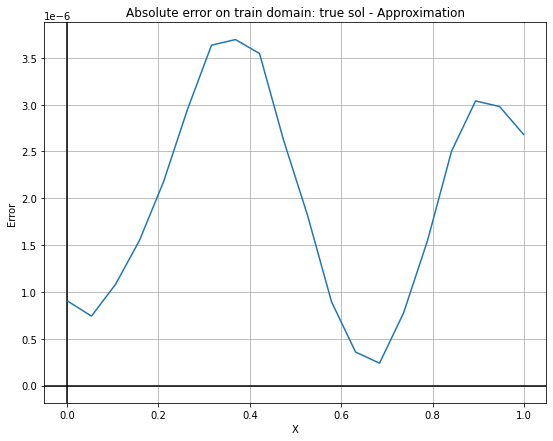

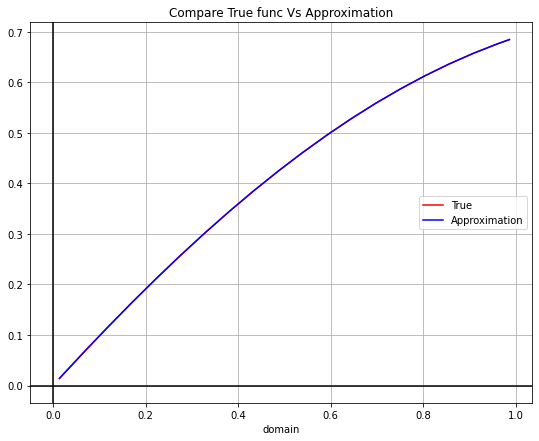

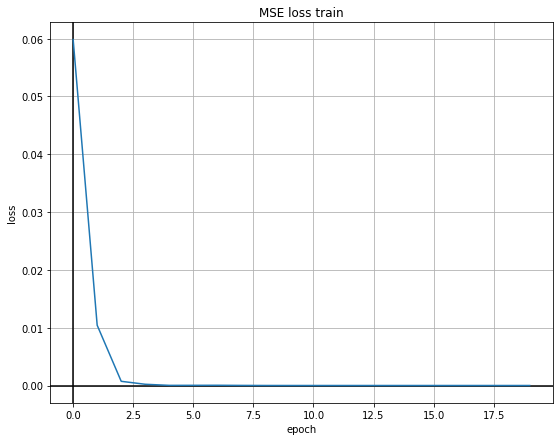

In [4]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

lets try to solve the same problem but on a smaller domain $x \in [0, 0.1]$

In [5]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda x, nn_model_value: nth_derivative(nn_model_value, x, 2)
    + 0.2 * nth_derivative(nn_model_value, x, 1)
    + nn_model_value
    + 0.2 * torch.exp(-x / 5) * torch.cos(x)
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(0 + dh, 0.1, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.sin(
    torch.Tensor([1])
) * torch.exp(torch.Tensor([-0.2]))
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 0.0061311498284339905
Valid max absolute error: 0.006052203476428986
Mean average percentage error on train data: 6.238045692443848 %
Mean average percentage error on validation data: 6.238696575164795 %
Max residual square loss on train: 0.0043052672408521175 


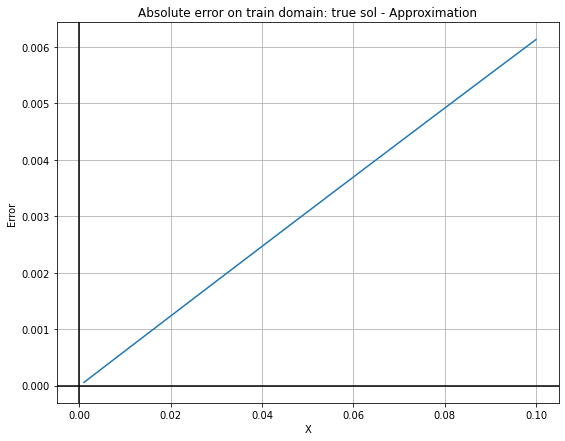

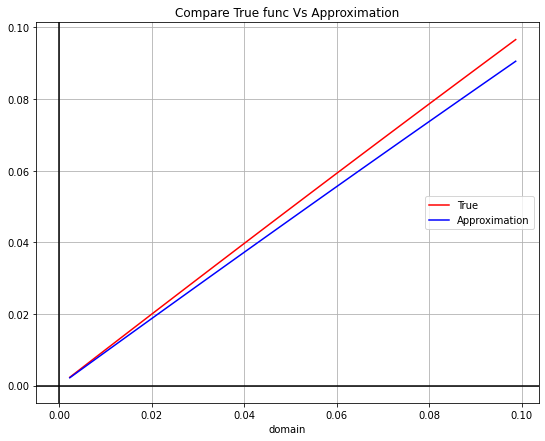

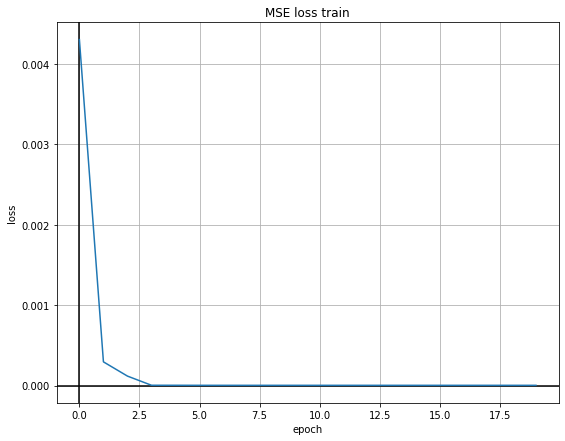

In [6]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

it is strange but descpite my expectations here on a smaller domain NN function performs worse

# Example №2
$$ u_{tt} + 0.2u_t + u = -0.2 exp(-\frac{t}{5})cos(t) $$
$$ u(0)=0 $$
$$ u'(0)=1 $$
$$ t \in [0,2] $$
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

In [7]:
left_bound = 0
right_bound = 2
main_eq_residual = (
        lambda x, nn_model_value: nth_derivative(nn_model_value, x, 2)
        + 0.2 * nth_derivative(nn_model_value, x, 1)
        + nn_model_value
        + 0.2 * torch.exp(-x / 5) * torch.cos(x)
    )
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - 1
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 3.9517879486083984e-05
Valid max absolute error: 3.9577484130859375e-05
Mean average percentage error on train data: 0.0049910638481378555 %
Mean average percentage error on validation data: 0.004972124006599188 %
Max residual square loss on train: 0.1649661809206009 


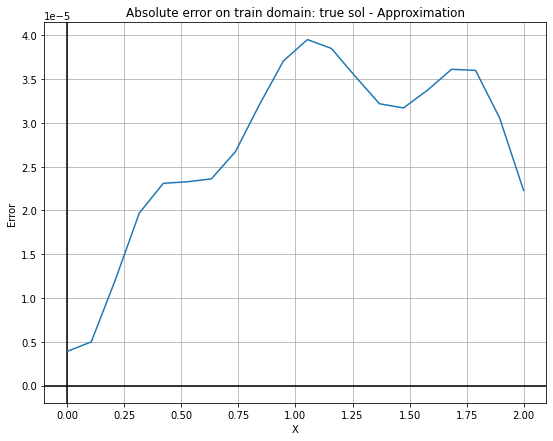

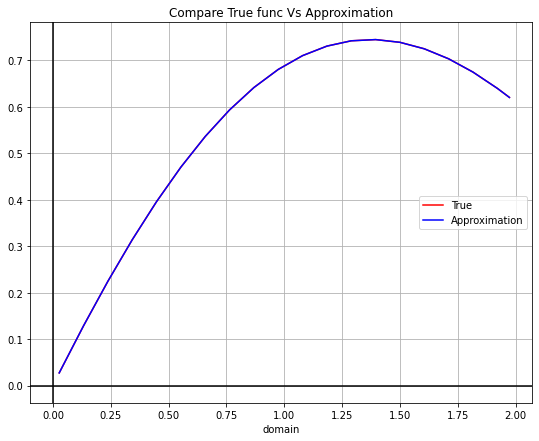

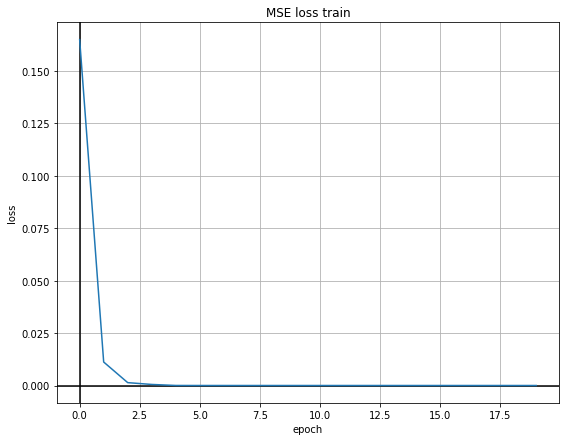

In [8]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

In [9]:
data = torch.linspace(0,10,100)
data = data.view(-1,1)

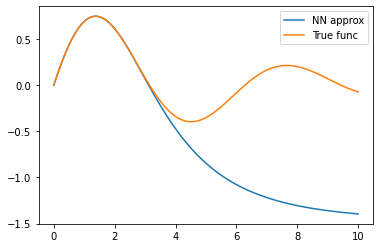

In [10]:
plt.plot(data, nn_model(data).detach().numpy(), label='NN approx')
plt.plot(data, true_solution(data).detach().numpy(), label='True func')
plt.legend()

hmm, apparently neural networks are not good at extrapolation of an unknown function

$$ u_{tt} + 0.2u_t + u = -0.2 exp(-\frac{t}{5})cos(t) $$
$$ u(0)=0 $$
$$ u'(0)=1 $$
$$ t \in [0,10] $$
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

lets try to solve the same problem but with a bigger domain, $t \in [0,10]$

In [11]:
left_bound = 0
right_bound = 10
main_eq_residual = (
        lambda x, nn_model_value: nth_derivative(nn_model_value, x, 2)
        + 0.2 * nth_derivative(nn_model_value, x, 1)
        + nn_model_value
        + 0.2 * torch.exp(-x / 5) * torch.cos(x)
    )
n_points = 100
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - 1
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 0.0835578590631485
Valid max absolute error: 0.0836581364274025
Mean average percentage error on train data: 10.797843933105469 %
Mean average percentage error on validation data: 10.870588302612305 %
Max residual square loss on train: 0.10148733109235764 


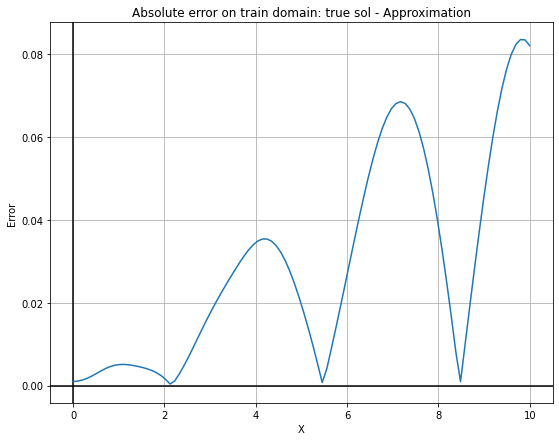

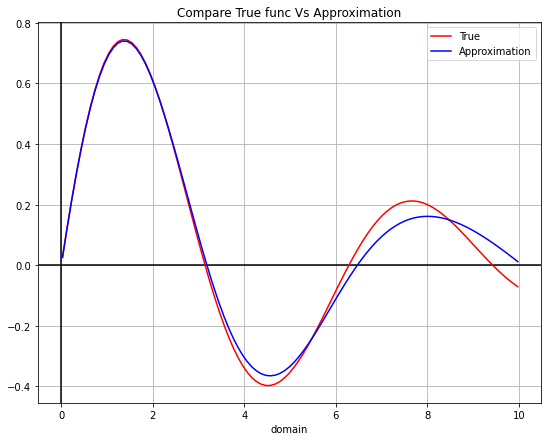

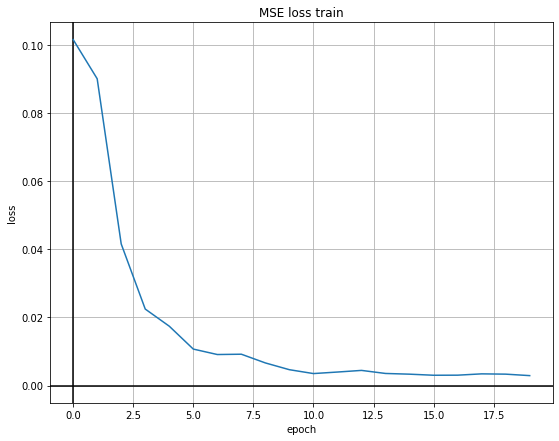

In [12]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

In [13]:
main_eq.get_residuals(nn_model, "train")[-1].item()**2

0.0028994641045712033

as you can see if domain is big then NN cannot approximate unknown function on a big domain properly

# Example №3
$$ u' + 0.2u = exp(- \frac{t}{5})cos(t) $$
$$ u(0) = 0 $$
$$ t \in [10,11] $$ 
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

In [14]:
left_bound = 10
right_bound = 12
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 1)
    + 0.2 * function
    -  torch.exp(-variable / 5) * torch.cos(variable)
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(0, first_init_cond_res)

boundary_conditions = [first_init_cond]

true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 4.018418788909912
Valid max absolute error: 3.9974782466888428
Mean average percentage error on train data: 3598.21923828125 %
Mean average percentage error on validation data: 3585.07568359375 %
Max residual square loss on train: 0.013294430449604988 


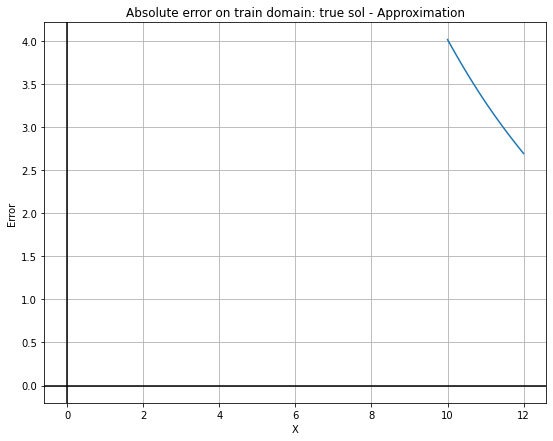

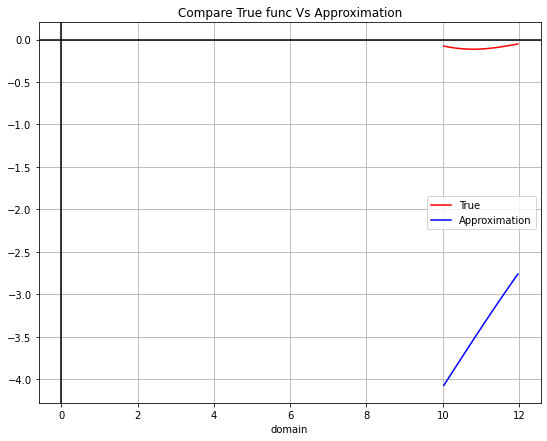

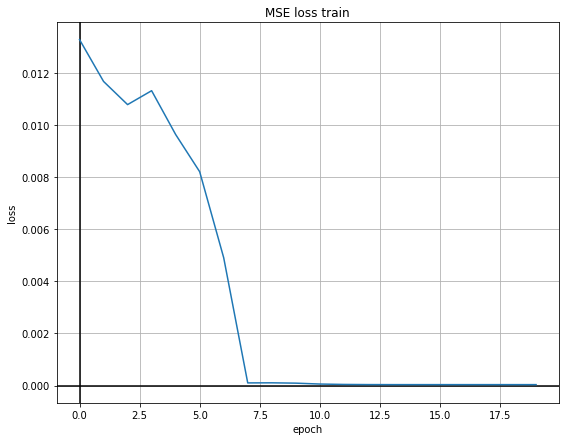

In [15]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

Apparently if | residual |=| left_part_eq - right_part_eq | ~ 0 doesnt mean 
that algorithm converged to a true solution

In [16]:
main_eq.get_residuals(nn_model, "train")[-1].item()**2

3.3628003103025605e-05

despite MSE's convergence to zero we see that function did not converge

# Example №4
$$ u''+4u=cos(2t) $$
$$ u(0)=1 $$
$$ u'(0)=-1 $$
$$ t \in [0,2] $$ 
$$ true\_solution = \frac{1}{4}*t * sin(2*t) + cos(2*t) - \frac{1}{2}sin(2*t) $$

In [17]:
left_bound = 0
right_bound = 2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + torch.tensor([4.0],requires_grad=True) * function
    - torch.cos(torch.tensor([2.0],requires_grad=True)*variable)
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) + torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]
true_solution = lambda x: 1/4 * x * torch.sin(2*x) + torch.cos(2*x) - 1/2 * torch.sin(2*x)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 0.00010204315185546875
Valid max absolute error: 9.763240814208984e-05
Mean average percentage error on train data: 0.0068327453918755054 %
Mean average percentage error on validation data: 0.006727580446749926 %
Max residual square loss on train: 0.8540957570075989 


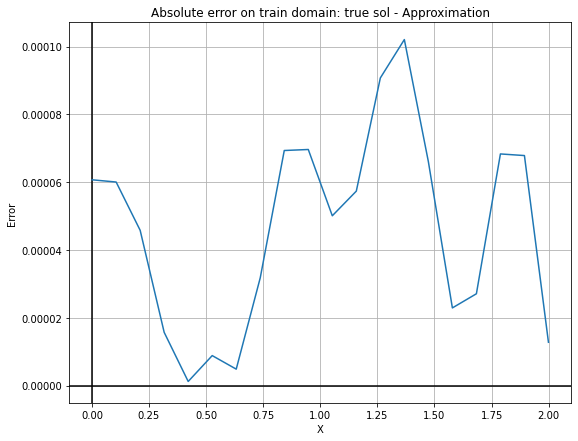

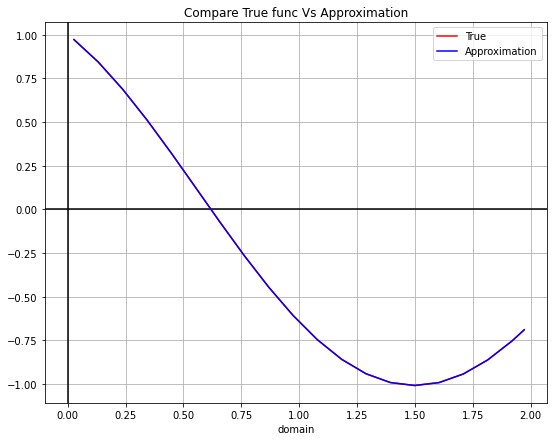

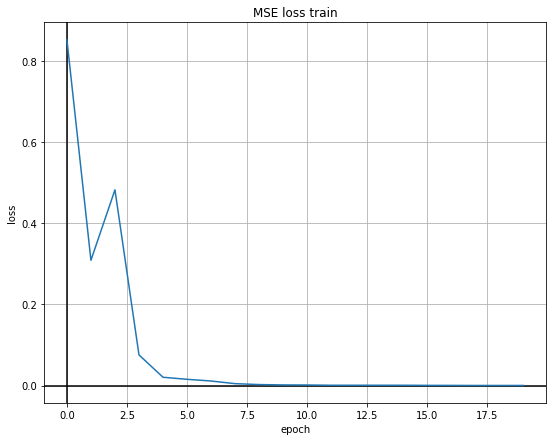

In [18]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

$$ u''+4u=cos(2t) $$
$$ u(0)=1 $$
$$ u'(0)=-1 $$
$$ t \in [0,10] $$ 
$$ true\_solution = \frac{1}{4}*t * sin(2*t) + cos(2*t) - \frac{1}{2}sin(2*t) $$

Again, if we expand domain we will see that there is no convergence

In [19]:
left_bound = 0
right_bound = 10
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + torch.tensor([4.0],requires_grad=True) * function
    - torch.cos(torch.tensor([2.0],requires_grad=True)*variable)
)
n_points = 100
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) + torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]
true_solution = lambda x: 1/4 * x * torch.sin(2*x) + torch.cos(2*x) - 1/2 * torch.sin(2*x)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 2.070543050765991
Valid max absolute error: 2.069826602935791
Mean average percentage error on train data: 84.74773406982422 %
Mean average percentage error on validation data: 85.1524658203125 %
Max residual square loss on train: 2.289433002471924 


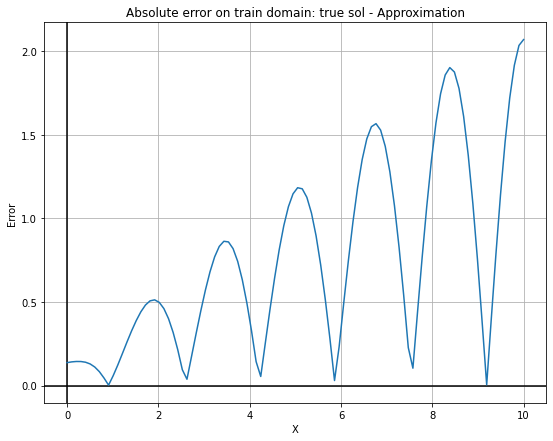

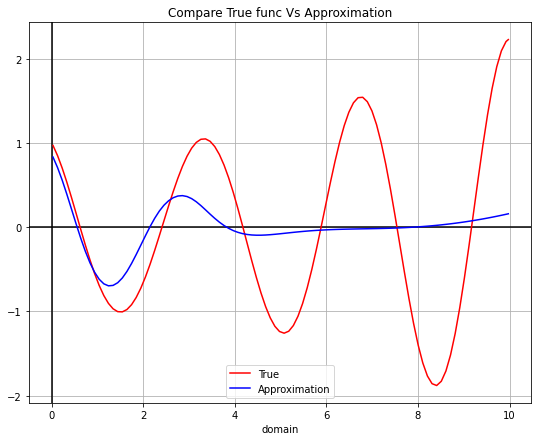

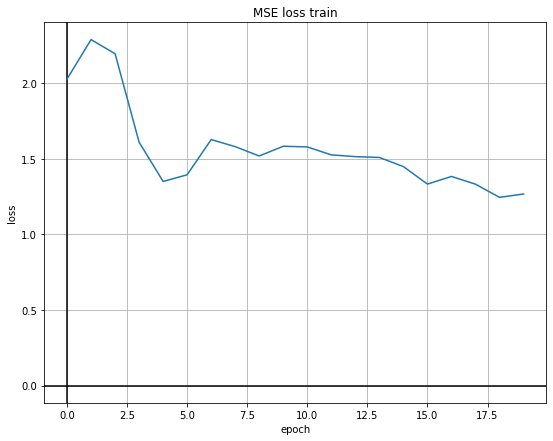

In [20]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №5
$$ u''' - 3u'' + 3u' -u = exp(t) $$
$$ u(0)=1 $$
$$ u'(0)=-1 $$
$$ u''(0)=1 $$
$$ t \in [0,1] $$ 
$$ true\_solution = \frac{1}{6} * exp(t) * (t^3 + 12*t^2-12*t+6) $$

In [21]:
left_bound = 0
right_bound = 5
main_eq_residual = (
    lambda variable, function,: 
      nth_derivative(function, variable, 3)
    - torch.tensor([3.0]) * nth_derivative(function, variable, 2)
    + torch.tensor([3.0]) * nth_derivative(function, variable, 1)
    - function
    - torch.exp(variable)
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) + torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,2) - torch.tensor([1.0],requires_grad=True)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

true_solution = lambda x: torch.exp(x) * 1/6 * (x*x*x + 12*x*x- 12*x + 6)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 9206.181640625
Valid max absolute error: 8347.6455078125
Mean average percentage error on train data: 103.47463989257812 %
Mean average percentage error on validation data: 103.3660888671875 %
Max residual square loss on train: 6877.640625 


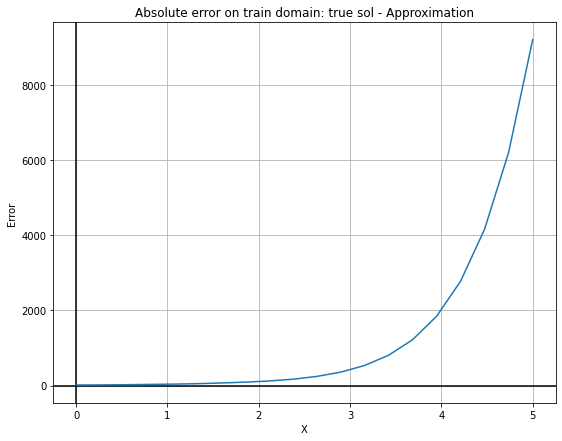

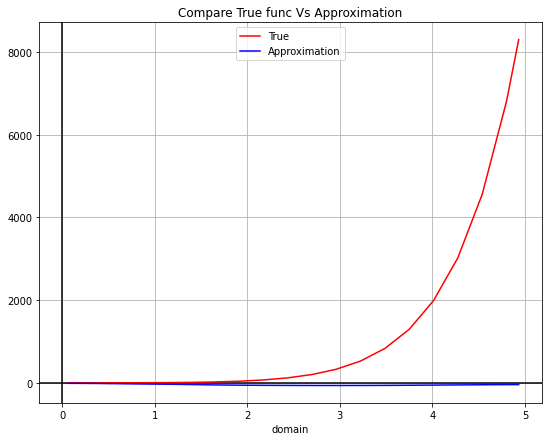

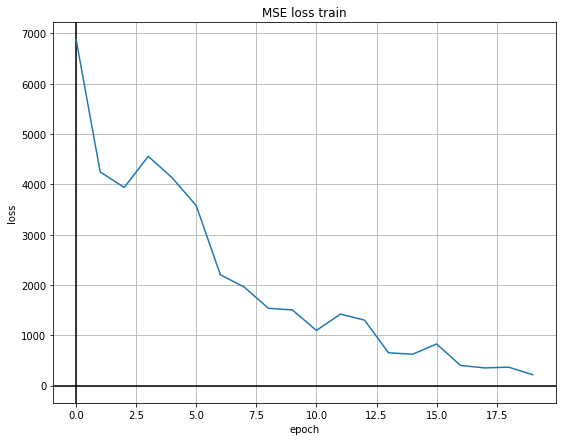

In [22]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №6
$$ u'' + u = -t $$
$$ u(0)=0 $$
$$ t \in [0,1] $$
$$ true\_solution = \frac{sin(x)}{sin(1)} - t $$

In [23]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + function
    + variable
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.tensor([0.0], requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: torch.sin(x)/torch.sin(torch.Tensor([1])) - x
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 9.387731552124023e-06
Valid max absolute error: 9.47713851928711e-06
Mean average percentage error on train data: 0.009428581222891808 %
Mean average percentage error on validation data: 0.009227955713868141 %
Max residual square loss on train: 0.4800054430961609 


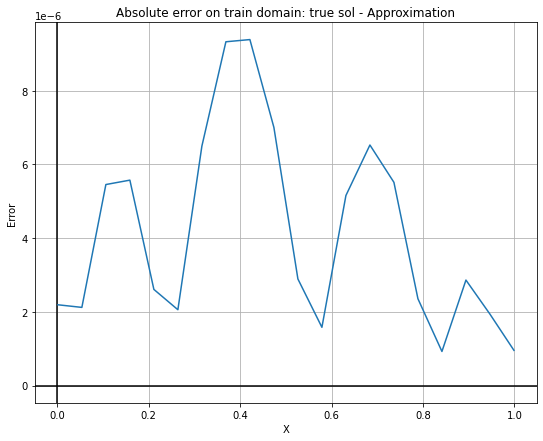

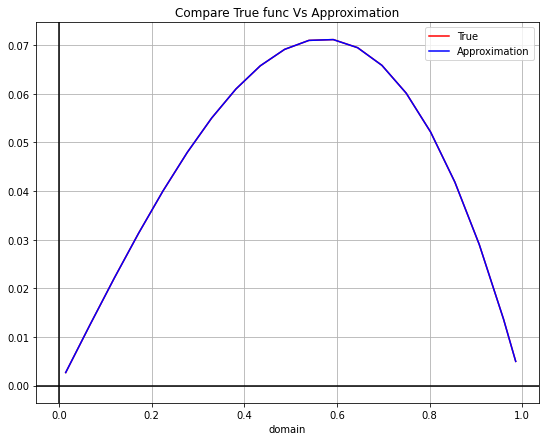

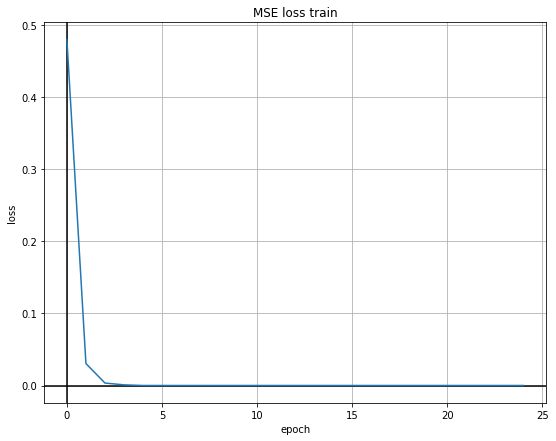

In [24]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №6
$$ u'' + u = 1 $$
$$ u'(0)=0 $$
$$ u(\frac{\pi}{2})-u'(\frac{\pi}{2})= 2 $$
$$ t \in [0,1] $$
$$ true\_solution = 1 + cos(t) $$

In [25]:
left_bound = 0
right_bound = pi/2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + function
    - 1
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nn_model_value - nth_derivative(nn_model_value,x,1) - 2
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: torch.Tensor([1]) + torch.cos(x)
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 3.9577484130859375e-05
Valid max absolute error: 3.921985626220703e-05
Mean average percentage error on train data: 0.001224546111188829 %
Mean average percentage error on validation data: 0.001210822956636548 %
Max residual square loss on train: 0.09906948357820511 


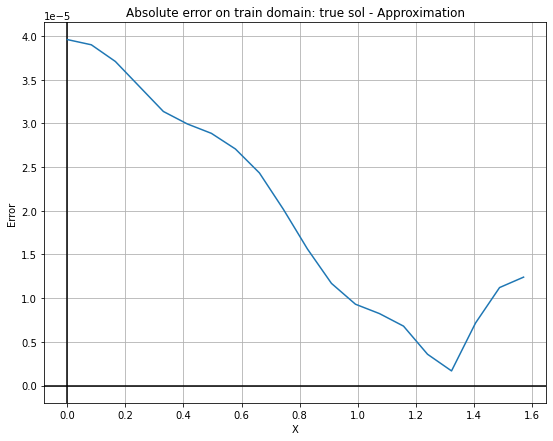

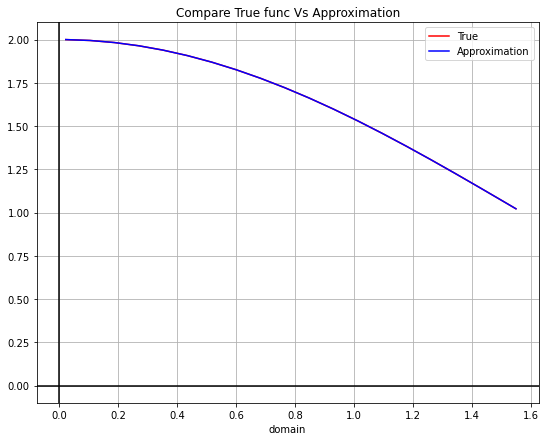

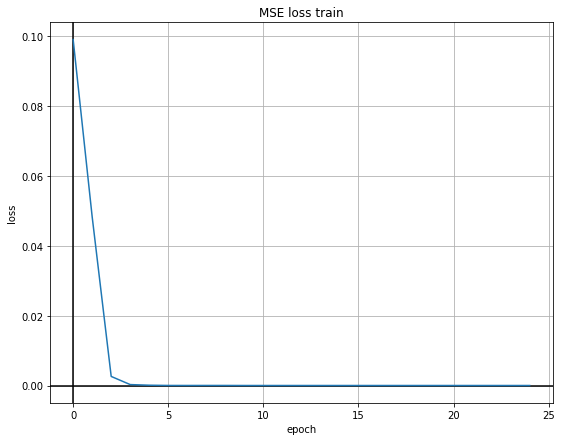

In [26]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №7
$$ u'' - u = 4exp(t) $$
$$ u(0)=0 $$
$$ u'(o)=1 $$
$$ t \in [0,1] $$ 
$$ true\_solution = 2t*exp(t) - sinh(t) $$

In [27]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    - function
    - torch.tensor([4.0],requires_grad=True) * torch.exp(variable)
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: 2 * x * torch.exp(x) - torch.sinh(x)
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 0.00013065338134765625
Valid max absolute error: 0.00012731552124023438
Mean average percentage error on train data: 0.004291884135454893 %
Mean average percentage error on validation data: 0.004250324331223965 %
Max residual square loss on train: 31.762514114379883 


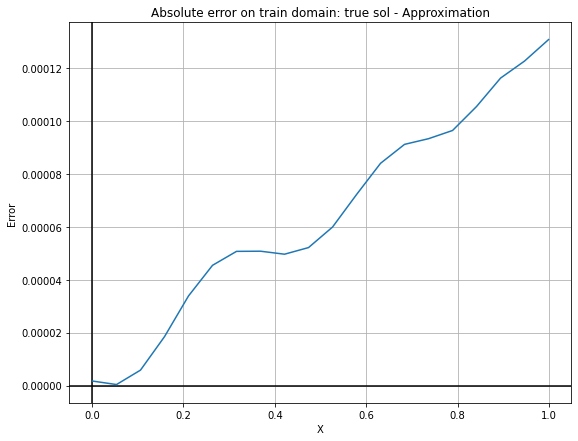

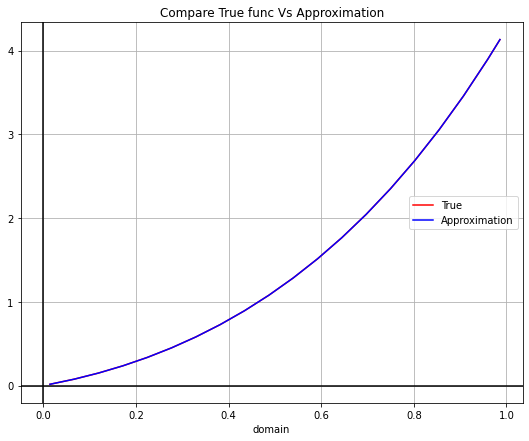

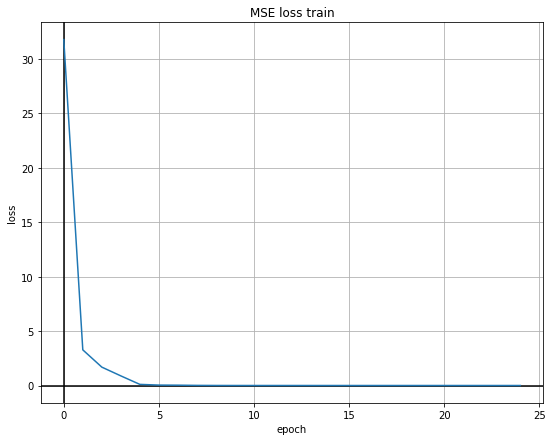

In [28]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №8
$$ (1+t^2)u''-2tu = 0 $$
$$ u(0)=0 $$
$$ u'(0)=3 $$
$$ t \in [0,1] $$
$$ true\_solution = t^3 + 3*t $$

In [29]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: (torch.tensor([1.0],requires_grad=True) + variable*variable)
    * nth_derivative(function, variable, 2)
    - 2 * variable * function
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - torch.tensor([3.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: (3*x + pow(x,4)/2 - pow(x,6)/5 + pow(x,7)/42 + 
                           3*pow(x,8)/28 - 7*pow(x,9)/360 - 25*pow(x,10)/378)
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 0.03422880172729492
Valid max absolute error: 0.02961587905883789
Mean average percentage error on train data: 0.2305888831615448 %
Mean average percentage error on validation data: 0.2318088859319687 %
Max residual square loss on train: 1.0378813743591309 


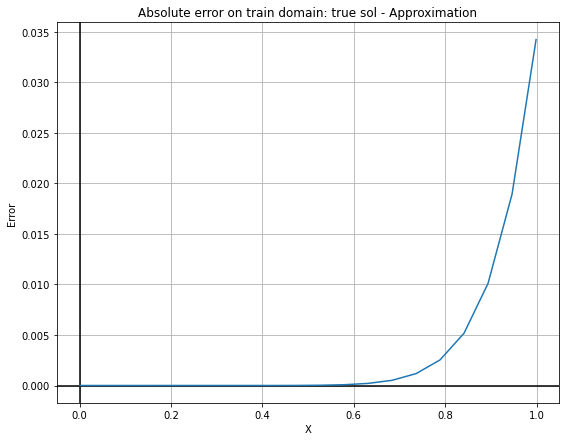

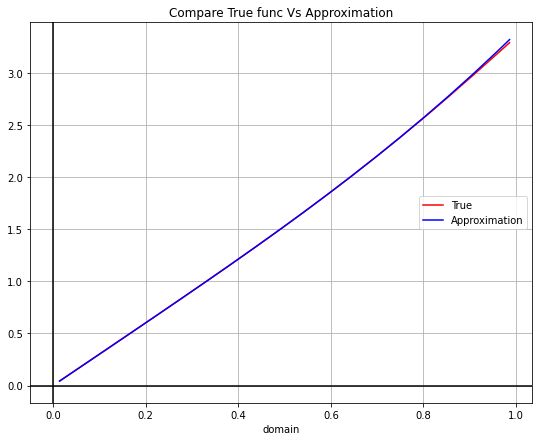

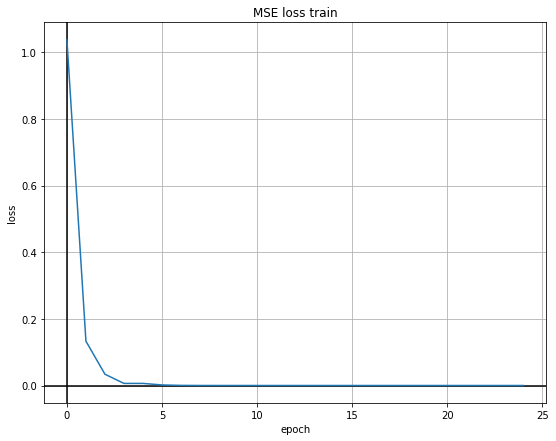

In [30]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №9
$$ u'''+ u'' = \frac{t-1}{t^2} $$
$$ u(1) = \frac{1+e}{e} $$
$$ u'(1) = -\frac{1+e}{e} $$
$$ u''(1) = \frac{1-e}{e} $$
$$ t \in [1,2] $$
$$ true\_sol =  -4t + tln(t) + 7 - 2exp(1-t) + exp(-t) $$

In [31]:
left_bound = 1
right_bound = 2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 3)
    + nth_derivative(function, variable, 2)
    - (variable-1)/(variable**2)
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - (1+e)/e
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) + torch.tensor([(1+e)/e],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,2) - torch.tensor([(1-e)/e],requires_grad=True)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

true_solution = lambda x: -x*4 + x * torch.log(x) + 7 - 2 * torch.exp(1-x) + torch.exp(-x)
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 9.8496675491333e-06
Valid max absolute error: 9.581446647644043e-06
Mean average percentage error on train data: 0.0006778815877623856 %
Mean average percentage error on validation data: 0.0007068365230225027 %
Max residual square loss on train: 0.16513501107692719 


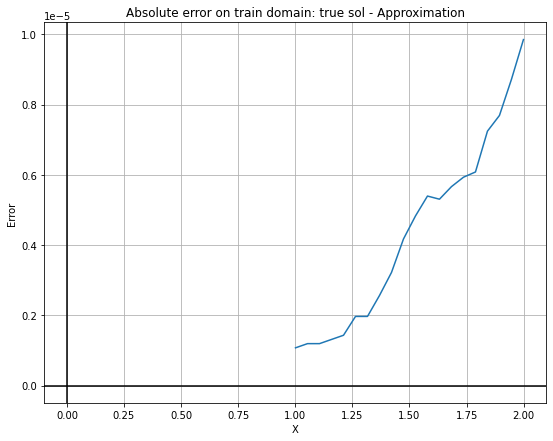

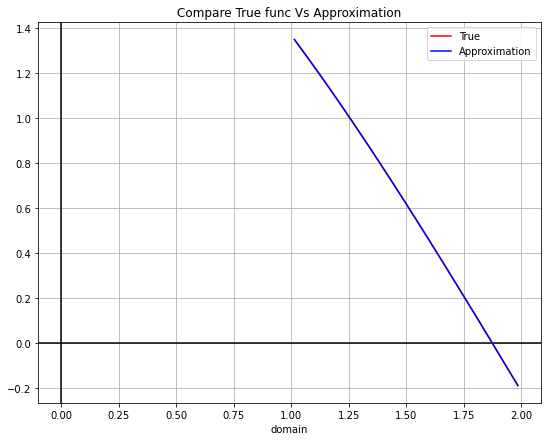

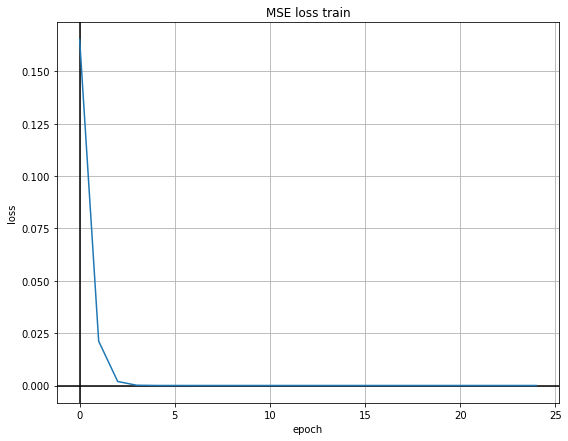

In [32]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №10
$$ u''''+ u'' = \frac{1 + sin^2(t)}{cos^3(t)} $$
$$ u(0) = 1 $$
$$ u'(0) = 0  $$
$$ u''(0) = 0 $$
$$ u'''(0) = 0 $$
$$ t \in [0, 1] $$ 
$$ true\_sol =  (1 + ln(cos(t)))*cos(t) + t * sin(t) $$

In [33]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 4)
    + nth_derivative(function, variable, 2)
    - (torch.tensor([1.0],requires_grad=True) + torch.sin(variable)*torch.sin(variable))
    /(torch.cos(variable)*torch.cos(variable)*torch.cos(variable))
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,2)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

fourth_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,3)
fourth_init_cond = OnePointInitialCondition(left_bound, fourth_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond, fourth_init_cond]

true_solution = lambda x: ((torch.tensor([1.0],requires_grad=True) + torch.log(torch.cos(x))) 
                           * torch.cos(x) + x * torch.sin(x))
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 8.821487426757812e-05
Valid max absolute error: 8.487701416015625e-05
Mean average percentage error on train data: 0.0028967256657779217 %
Mean average percentage error on validation data: 0.0029545030556619167 %
Max residual square loss on train: 9.61460018157959 


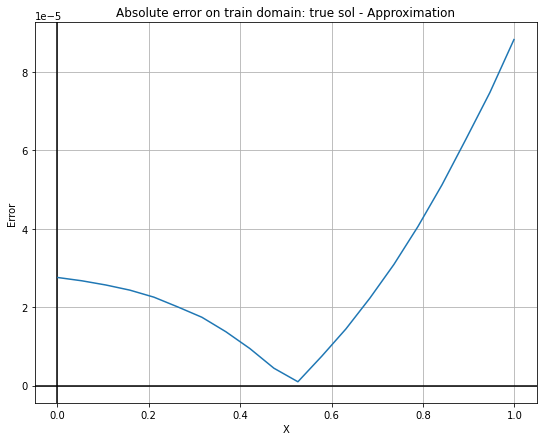

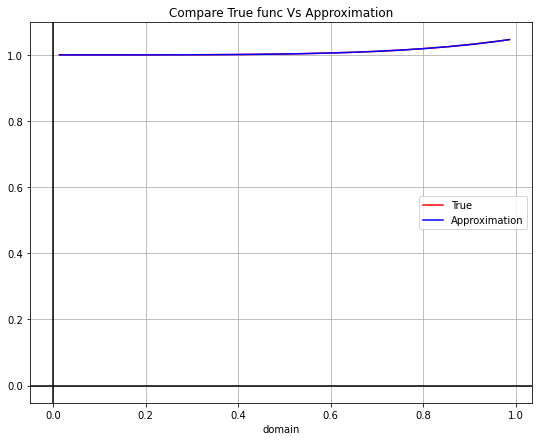

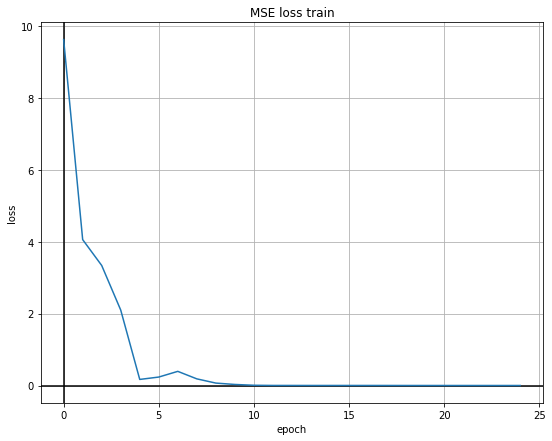

In [34]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №11
$$ u'''+ u' = t*sin(t) + 3*cos(t) $$
$$ u(0) = 1 $$
$$ u'(0) = 2  $$
$$ u''(0) = 0 $$
$$ t \in [0, 1] $$
$$ true\_sol =  1/4 * (-(t^2 - 17) * sin(t) - 9 * t * cos(t) + 4) $$

In [35]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 3)
    + nth_derivative(function, variable, 1)
    - variable * torch.sin(variable) - 3 * torch.cos(variable)
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - torch.tensor([2.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,2)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

true_solution = lambda x: 1/4*(-(x**2-17)*torch.sin(x)-9*x*torch.cos(x)+4)
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 1.3828277587890625e-05
Valid max absolute error: 1.33514404296875e-05
Mean average percentage error on train data: 0.00023395147582050413 %
Mean average percentage error on validation data: 0.00023370164853986353 %
Max residual square loss on train: 0.22225147485733032 


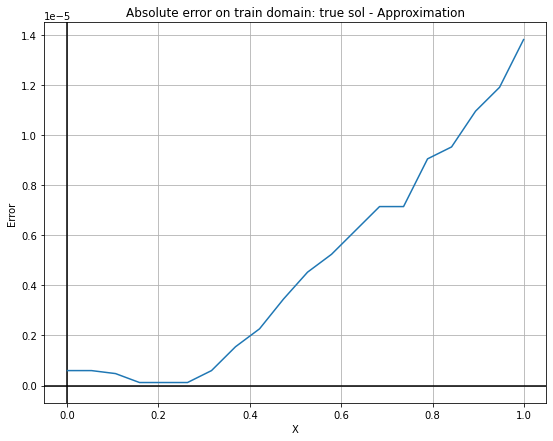

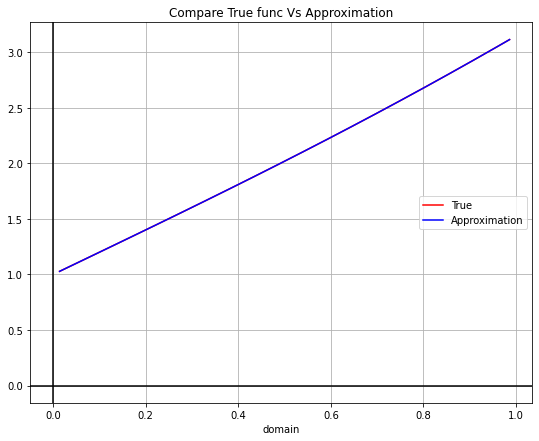

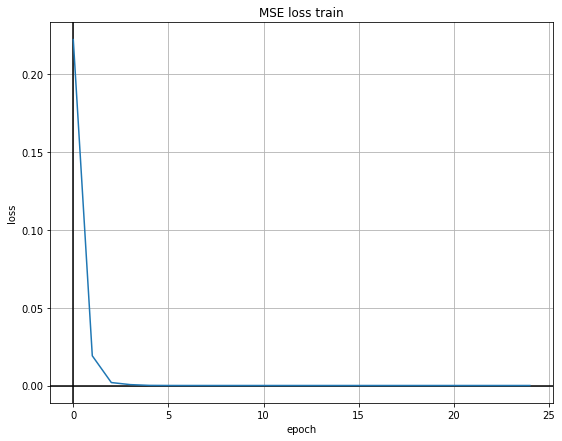

In [36]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №12. A physical problem 

A rubber cord with a length of **1** meter is extended by **kf** meters under the action of a force **f** kg. 

By how much will the same cord of length **l** and weight **m** be extended under the action of its own weight, if it is hung at one end?

$$ u'= \frac{km}{l}(l-x) $$
$$ u(0) = 0 $$
$$ x \in [0, l] $$
$$ true\_sol =  \frac{km}{2l}*(l-x)x $$

Lets assume that $l = 3$ meters, $m = 5$ kg, $k = 2\frac{Newton}{meter}$

In [37]:
l = 10
m = 5
k = 2
left_bound = 0
right_bound = l
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 1)
    - k*m/l*(l-variable)
)
n_points = 50
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

boundary_conditions = [first_init_cond]

true_solution = lambda x: k*m/(2*l)*(2*l-x)*x
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 0.00128173828125
Valid max absolute error: 0.0012984275817871094
Mean average percentage error on train data: 0.0020991824567317963 %
Mean average percentage error on validation data: 0.0020970350597053766 %
Max residual square loss on train: 2.461317300796509 


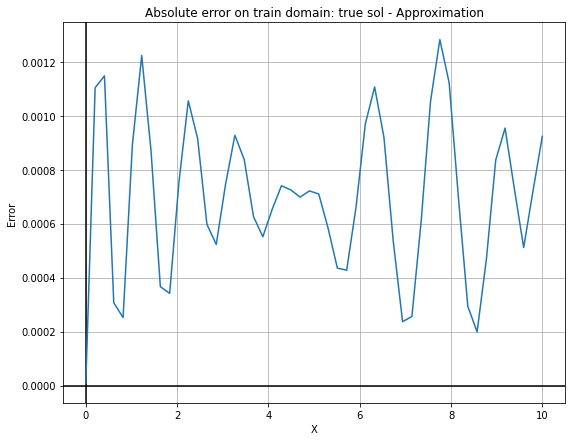

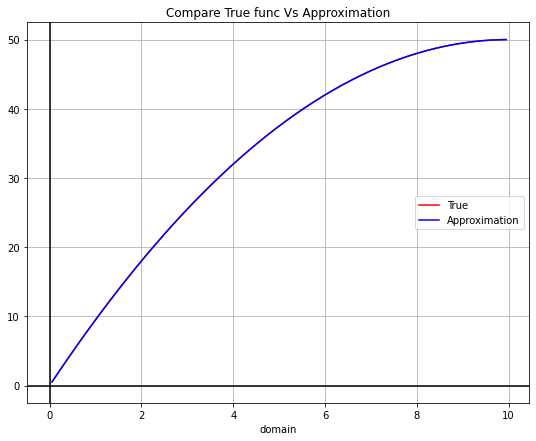

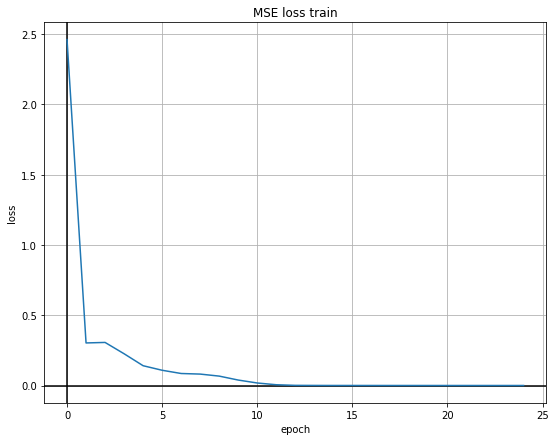

In [38]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()